In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

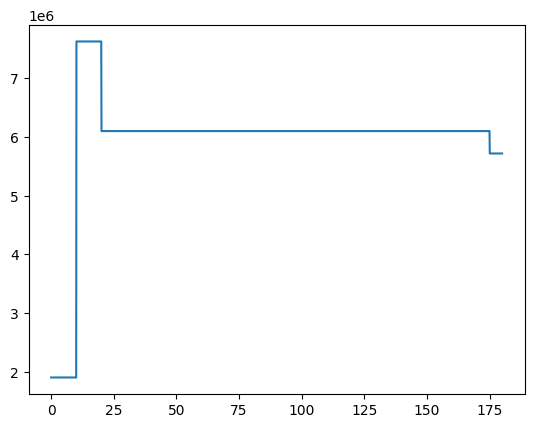

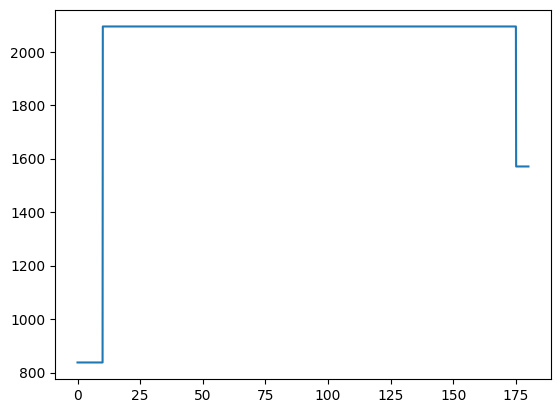

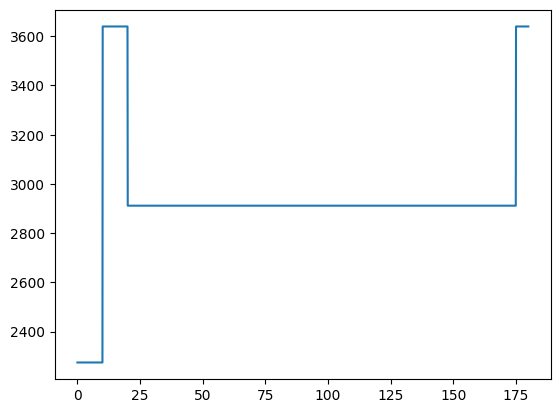

In [29]:
increase_in_power = 1.1 # Multiply by maximum engine low_altitude_power

maximum_engine_power = 1050                 # hp
maximum_engine_power *= increase_in_power   # hp
maximum_engine_power *= 6600                # lb-in/s

turbine_rotational_speed = 20000            # rpm
turbine_rotational_speed *= 2 * np.pi / 60  # rad/s

cycle_time_la = 180
low_altitude_time = np.linspace(0, cycle_time_la, cycle_time_la * 10 + 1)
low_altitude_power, low_altitude_rotational_speed = np.zeros(cycle_time_la * 10 + 1), np.zeros(cycle_time_la * 10 + 1)

low_altitude_power[low_altitude_time <= 10] += 0.25 * maximum_engine_power
low_altitude_power[np.logical_and(low_altitude_time > 10, low_altitude_time <= 20)] += maximum_engine_power
low_altitude_power[np.logical_and(low_altitude_time > 20, low_altitude_time <= 175)] += 0.8 * maximum_engine_power
low_altitude_power[np.logical_and(low_altitude_time > 175, low_altitude_time <= 180)] += 0.75 * maximum_engine_power

low_altitude_rotational_speed[low_altitude_time <= 10] += 0.4 * turbine_rotational_speed
low_altitude_rotational_speed[np.logical_and(low_altitude_time > 10, low_altitude_time <= 20)] += turbine_rotational_speed
low_altitude_rotational_speed[np.logical_and(low_altitude_time > 20, low_altitude_time <= 175)] += turbine_rotational_speed
low_altitude_rotational_speed[np.logical_and(low_altitude_time > 175, low_altitude_time <= 180)] += 0.75 * turbine_rotational_speed

low_altitude_torque = low_altitude_power / low_altitude_rotational_speed

cycle_time_ha = 25
high_altitude_time = np.linspace(0, cycle_time_ha, cycle_time_ha * 10 + 1)
high_altitude_power, high_altitude_rotational_speed = np.zeros(cycle_time_ha * 10 + 1), np.zeros(cycle_time_ha * 10 + 1)

high_altitude_power[high_altitude_time <= 10] += 0.25 * maximum_engine_power
high_altitude_power[np.logical_and(high_altitude_time > 10, high_altitude_time <= 20)] += maximum_engine_power
high_altitude_power[np.logical_and(high_altitude_time > 20, high_altitude_time <= 25)] += 0.75 * maximum_engine_power

high_altitude_rotational_speed[high_altitude_time <= 10] += 0.4 * turbine_rotational_speed
high_altitude_rotational_speed[np.logical_and(high_altitude_time > 10, high_altitude_time <= 20)] += turbine_rotational_speed
high_altitude_rotational_speed[np.logical_and(high_altitude_time > 20, high_altitude_time <= 25)] += 0.75 * turbine_rotational_speed

high_altitude_torque = high_altitude_power / high_altitude_rotational_speed

plt.plot(low_altitude_time, low_altitude_power)
plt.show()
plt.plot(low_altitude_time,  low_altitude_rotational_speed)
plt.show()
plt.plot(low_altitude_time, low_altitude_torque)
plt.show()


In [30]:
full_cycle = 180 * 10 + 25
time = np.linspace(0, full_cycle, full_cycle * 10 + 1)

power = np.tile(low_altitude_power[:-1], 10)
power = np.append(power, high_altitude_power)

rotational_speed = np.tile(low_altitude_rotational_speed[:-1], 10)
rotational_speed = np.append(rotational_speed, high_altitude_rotational_speed)

torque = power / rotational_speed

average_rot_speed = integrate.simpson(rotational_speed, time) / full_cycle
average_torque = integrate.simpson(torque, time) / full_cycle

print(average_torque)
print((np.max(torque) + np.min(torque)) / 2)



2938.670499996353
2957.2679447744504
